## **Principal Component Analysis (PCA)**

Import libraries

In [1]:
# 완전히 다른 feature로 변환해서 feature를 사용해보자.
import numpy as np
import matplotlib.pyplot as plt

(200, 2)


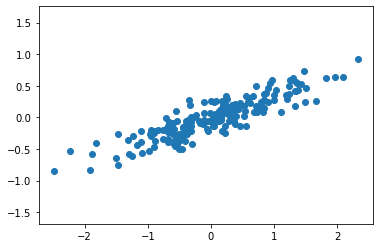

In [21]:
np.random.seed(1) # 난수 생성 할 때 마다 값이 달라지는 것이 아니라, 누가, 언제 하든지 간에 똑같은 난수 생성을 원한다면 (즉, 재현가능성, reproducibility) seed 번호를 지정해주면 됩니다.

X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T # 다차원의 array 형태로 무작위 샘플을 생성할 수 있다
print(X.shape)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal')
plt.show()

Let's find the principle components

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # principle vector 몇개 찾을꺼야? eigenvalue 가장 높은 거.
pca.fit(X)

print(pca.explained_variance_)  # percentage of variance explained by each component : eigenvalues
print(pca.components_)          # principal axes in feature space : eigenvectors

# 고유값 두개, 고유벡터 두개 나온다.

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


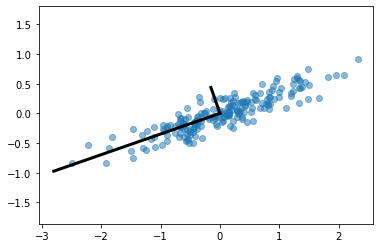

In [4]:
# vector 시각화
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Let's see what our data look like if we only keep 95% of the variance:

In [23]:
pca95 = PCA(0.95)     # keep 95% of variance / 기존 분산량의 95% 보존하면서 변환하겠다.
X_trans = pca95.fit_transform(X)    # fit PCA and transform data / 찾아서 실제 변환까지

print(X.shape)
print(X_trans.shape) # 결과보면 feature가 하나로 줄었다.

(200, 2)
(200, 1)


By keeping 95% of the varaince (throw away 5% of the variance), the data is now compressed by a factor of 50%! 

Let's see what the data look like after this compression:

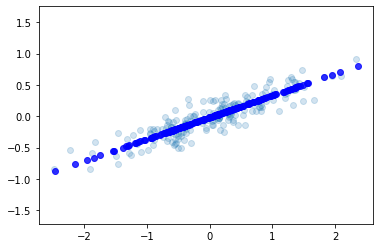

In [6]:
# 변환된 data로 역으로 복원해보는 것
X_new = pca95.inverse_transform(X_trans)

plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

# **Breast Cancer Wisconsin (Diagnostic) Dataset**
*   569 instances (212 Malignant, 357 Benign)
*   30 numerical features (computed from a digitized image of a breast mass)
*   2 classes (Malignant, Benign)


Import libraries

In [24]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

Prepare data

In [8]:
wisconsin = datasets.load_breast_cancer()
TrainX, TestX, TrainY, TestY = train_test_split(wisconsin.data, wisconsin.target, test_size=0.7, random_state=0)

Add random noise

In [9]:
rTrainX = np.concatenate((TrainX, np.random.randn(TrainX.shape[0], 10)), axis=1)
rTestX = np.concatenate((TestX, np.random.randn(TestX.shape[0], 10)), axis=1)
print(rTrainX.shape)

(170, 40)


Classification

In [10]:
svmmodel = svm.SVC(kernel="linear", probability=True)
svmmodel.fit(rTrainX, TrainY)

tr_pred = svmmodel.predict(rTrainX)
tr_acc = metrics.accuracy_score(TrainY, tr_pred)

ts_pred = svmmodel.predict(rTestX)
ts_acc = metrics.accuracy_score(TestY, ts_pred)

print('Training Accuracy : ', tr_acc)
print('Test Accuracy : ', ts_acc)

Training Accuracy :  1.0
Test Accuracy :  0.9423558897243107


PCA

In [11]:
pca = PCA(n_components=5) # feature 5개만 하자
pca.fit(rTrainX) # data 주고
TrainX_trans = pca.transform(rTrainX) # 5개의 feature를 갖는 걸로 바뀜
TestX_trans = pca.transform(rTestX)

print(TrainX_trans[:5,:])
print(TestX_trans[:5,:])

[[ 5.82376658e+02  6.20161877e+01  2.56753494e+01 -1.85432485e+01
   1.16635058e+01]
 [-6.82885608e+02  5.95350673e+01  1.40089962e+01  6.37015914e+00
   1.41131645e+00]
 [-2.24588895e+02 -2.18943638e+01 -5.32701506e+00  3.52293963e+00
   2.32586211e+00]
 [-6.64679655e+02  6.05645306e+01  4.00891616e+01  4.68029319e+00
   3.26398965e+00]
 [ 1.84143188e+02  9.54356765e+01 -2.03348968e+01 -3.95087089e+00
  -5.99189921e-01]]
[[-1.34497747e+02  6.16296829e+01 -1.00149542e+01 -1.01099388e+01
  -3.80031837e-01]
 [-3.28951275e+02 -2.65297123e+01 -3.12697992e+00  1.16539080e+00
  -1.19327382e+01]
 [-2.46112084e+02 -5.88820215e+01 -1.72054624e+00  4.02314072e+00
   5.38037842e+00]
 [-1.19168287e+02 -1.80132598e+01 -1.33430979e+01  8.27102707e-01
   1.25115635e+00]
 [-4.11835496e+02 -5.72047861e+01  2.95830245e+00  6.73340744e+00
  -6.78534721e-01]]


In [12]:
svmmodel2 = svm.SVC(kernel="linear", probability=True)
svmmodel2.fit(TrainX_trans, TrainY)

tr_pred2 = svmmodel2.predict(TrainX_trans)
tr_acc2 = metrics.accuracy_score(TrainY, tr_pred2)

ts_pred2 = svmmodel2.predict(TestX_trans)
ts_acc2 = metrics.accuracy_score(TestY, ts_pred2)

print('Training Accuracy : ', tr_acc2)
print('Test Accuracy : ', ts_acc2)

# 5개 쓰나. 30개 쓰나 test acc이 비슷하다.
# 몇개 가져갈지는 어떻게 알지? 다 돌려봐야되나?

Training Accuracy :  0.9705882352941176
Test Accuracy :  0.9473684210526315
